## Challenge Set 2-luther1
Topic:        Explore Some Movie Data  
Date:         07/11/2016  
Name:         Adam Levin  
Worked with:  None

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

In [188]:
data = pd.read_csv('challenges_data/2013_movies.csv')

In [189]:
data.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00


**Challenge 1**

In [190]:
for c,d in zip(data.columns,data.dtypes):
    print c,d

Title object
Budget float64
DomesticTotalGross int64
Director object
Rating object
Runtime int64
ReleaseDate object


In [191]:
data.ReleaseDate = [date(*map(int,d.split()[0].split('-'))) for d in data.ReleaseDate]

In [192]:
data.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22


In [193]:
for d in data.ReleaseDate:
    assert isinstance(d,date)

In [194]:
for c,d in zip(data.columns,data.dtypes):
    print c,d

Title object
Budget float64
DomesticTotalGross int64
Director object
Rating object
Runtime int64
ReleaseDate object


In [195]:
sum(data.DomesticTotalGross.isnull())

0

In [196]:
sum(data.ReleaseDate.isnull())

0

In [197]:
data = data.sort_values('ReleaseDate')

In [198]:
data.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11


In [199]:
data.insert(3,'RollingAveDTG5',data.DomesticTotalGross.rolling(window=5,center=True).mean())

In [200]:
## the below is not implemented so I will implement my own
#data.insert(len(data.columns),'RollingAveRD5',data.ReleaseDate.rolling(window=5,center=True).mean())

In [251]:
def time_rolling_mean(series):
    if len(series)<5:
        return [np.nan]*len(series)
    new_series = []
    for ind in range(2,len(series)-2):
        new_series.append(date.fromordinal(int(sum(d.toordinal() for d in series[ind-2:ind+3])/5.0)))
    return [np.nan,np.nan] + new_series + [np.nan,np.nan]

In [202]:
data.ReleaseDate[0:6]

83    2013-01-04
76    2013-01-11
70    2013-01-11
46    2013-01-18
63    2013-01-25
52    2013-02-01
Name: ReleaseDate, dtype: object

In [203]:
if 'RollingReleaseDate5' in data.columns:
    data = data.drop('RollingReleaseDate5',axis=1)
data = data.sort_values('ReleaseDate')
data.insert(len(data.columns),'RollingReleaseDate5',time_rolling_mean(data.ReleaseDate))

In [204]:
data.head(5)

,Title,Budget,DomesticTotalGross,RollingAveDTG5,Director,Rating,Runtime,ReleaseDate,RollingReleaseDate5
83,Texas Chainsaw 3D,NaN,34341945,NaN,John Luessenhop,R,92,2013-01-04,NaN
76,A Haunted House,2500000.0,40041683,NaN,Michael Tiddes,R,80,2013-01-11,NaN
70,Gangster Squad,60000000.0,46000903,49543237.2,Ruben Fleischer,R,113,2013-01-11,2013-01-13
46,Mama,15000000.0,71628180,55950980.6,Andres Muschietti,PG-13,100,2013-01-18,2013-01-19
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,54377195.4,Tommy Wirkola,R,88,2013-01-25,2013-01-25


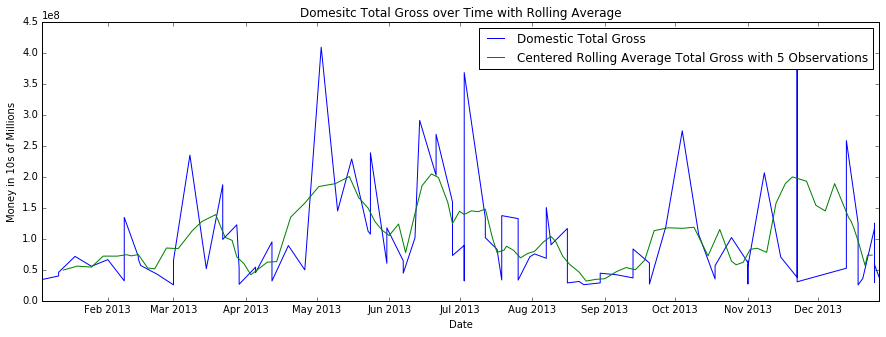

In [205]:
plt.figure(figsize=(15,5))
x = data.ReleaseDate
y = data.DomesticTotalGross
x2 = data[data.RollingReleaseDate5.notnull()].RollingReleaseDate5
y2 = data[data.RollingReleaseDate5.notnull()].RollingAveDTG5
plt.plot(x,y,label='Domestic Total Gross')
plt.plot(x2,y2,label='Centered Rolling Average Total Gross with 5 Observations')
plt.ylabel('Money in 10s of Millions')
plt.xlabel('Date')
plt.title('Domestic Total Gross over Time with Rolling Average')
plt.legend();

No discernable pattern

**Challenge 2**

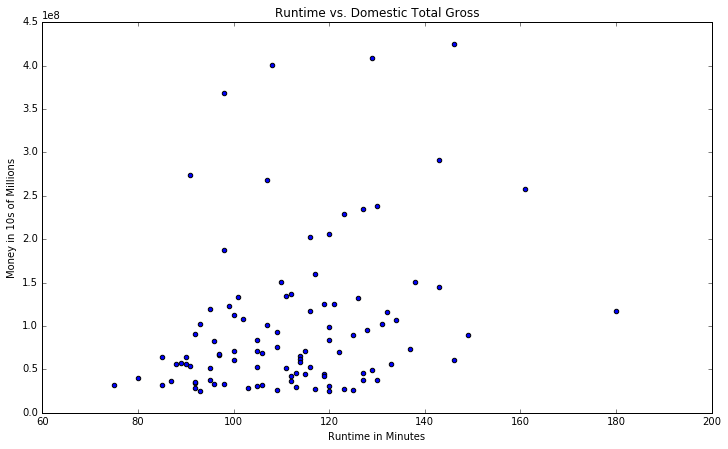

In [227]:
plt.figure(figsize=(12,7))
plt.ylabel('Money in 10s of Millions')
plt.xlabel('Runtime in Minutes')
plt.title('Runtime vs. Domestic Total Gross')
plt.scatter(data.Runtime,data.DomesticTotalGross);

Possibly a positive relationship?

**Challenge 3**

In [210]:
grouped_by_rating = data.groupby('Rating')

In [214]:
print grouped_by_rating['Runtime','DomesticTotalGross'].mean()

           Runtime  DomesticTotalGross
Rating                                
G       107.000000        2.684928e+08
PG       99.933333        1.311357e+08
PG-13   117.510638        1.114498e+08
R       110.729730        6.989243e+07


**Challenge 4**

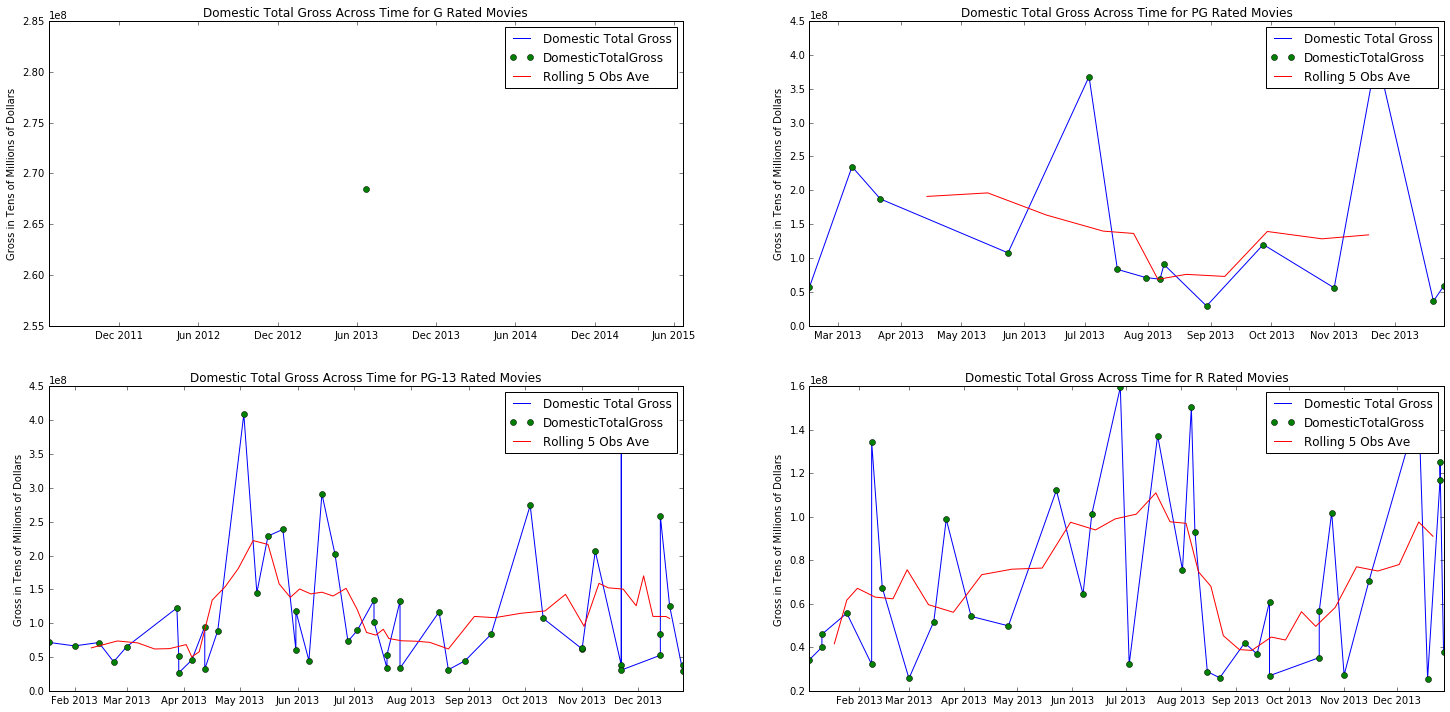

In [258]:
f, axarr = plt.subplots(2,2,figsize=(25,12));
for u,tup in enumerate(grouped_by_rating):
    rating,df = tup
    axarr[u/2,u%2].plot(df.ReleaseDate,df.DomesticTotalGross,label='Domestic Total Gross')
    axarr[u/2,u%2].plot_date(df.ReleaseDate,df.DomesticTotalGross)
    df = df.sort_values('ReleaseDate')
    df.insert(len(df.columns),'InGroupRollDTG5',df.DomesticTotalGross.rolling(window=5,center=True).mean())
    df.insert(len(df.columns),'InGroupRollRD5',time_rolling_mean(df.ReleaseDate))
    not_null = df[df.InGroupRollRD5.notnull()]
    axarr[u/2,u%2].plot(not_null.InGroupRollRD5,not_null.InGroupRollDTG5,label='Rolling 5 Obs Ave')
    axarr[u/2,u%2].set_title('Domestic Total Gross Across Time for %s Rated Movies' % rating)
    axarr[u/2,u%2].set_ylabel('Time')
    axarr[u/2,u%2].set_ylabel('Gross in Tens of Millions of Dollars')
    axarr[u/2,u%2].legend()

**Challenge 5**

In [259]:
grouped_by_director = data.groupby('Director')

In [261]:
print grouped_by_director['DomesticTotalGross'].mean().sort_values(ascending=False).head()

Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
Name: DomesticTotalGross, dtype: int64


**Challenge 6**

In [262]:
data.head(3)

,Title,Budget,DomesticTotalGross,RollingAveDTG5,Director,Rating,Runtime,ReleaseDate,RollingReleaseDate5
83,Texas Chainsaw 3D,NaN,34341945,NaN,John Luessenhop,R,92,2013-01-04,NaN
76,A Haunted House,2500000.0,40041683,NaN,Michael Tiddes,R,80,2013-01-11,NaN
70,Gangster Squad,60000000.0,46000903,49543237.2,Ruben Fleischer,R,113,2013-01-11,2013-01-13


In [263]:
data = data.drop(['RollingAveDTG5','RollingReleaseDate5'],axis=1)

In [264]:
data.insert(len(data.columns),'month',[d.month for d in data.ReleaseDate])

In [265]:
data.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,month
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04,1
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11,1


In [266]:
grouped_by_month = data.groupby('month')

In [268]:
mean_by_month = grouped_by_month['DomesticTotalGross'].mean()

In [305]:
def resample(sample,iters):
    overall_mean = np.mean(sample)
    ss = 0
    for _ in xrange(iters):
        mean = np.mean(np.random.choice(sample,len(sample),replace=True))
        ss += (mean - overall_mean)**2
    return (ss/iters)**.5

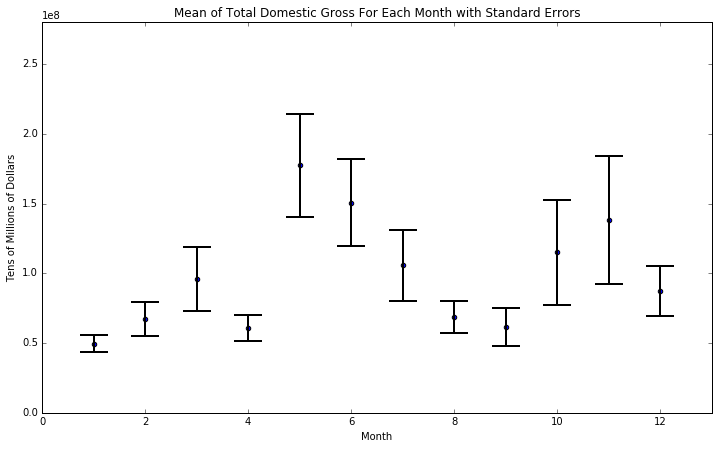

In [313]:
plt.figure(figsize=(12,7))
plt.scatter(mean_by_month.index,mean_by_month)
for m in mean_by_month.index:
    se = resample(data[data.month==m].DomesticTotalGross,1000)
    plt.plot([m,m], [mean_by_month[m] - se,mean_by_month[m] + se], 'k-', lw=2)
    plt.plot([m - .25,m + .25],[mean_by_month[m] - se,mean_by_month[m] - se], 'k-', lw=2)
    plt.plot([m - .25,m + .25],[mean_by_month[m] + se,mean_by_month[m] + se], 'k-', lw=2)
plt.ylabel('Tens of Millions of Dollars')
plt.xlabel('Month')
plt.title('Mean of Total Domestic Gross For Each Month with Standard Errors')
plt.ylim(ymin=0, ymax=280000000)
plt.xlim(xmin=0,xmax=13);

In [308]:
#sample sizes
for m in mean_by_month.index:
    print m,len(data[data.month==m])

1 5
2 7
3 9
4 6
5 8
6 8
7 12
8 11
9 6
10 5
11 10
12 13


For standard error of the mean, I resampled the samples of each month with replacement and recorded the standard error of the mean of each sample.

And inlies the weakness of resampling methods: too much confidence for small sample sizes.